# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

### Importação de Módulos e Dados, e seu tratamento

In [163]:
import pandas as pd

servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')
clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';')
funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';')
display(servicos_df.head())
display(clientes_df.head())
display(funcionarios_df.head())



,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955,4382,242,"719,04",Diretor,Operações
1,2,C,João Haddad,5404,2702,"1080,8",154,"574,56",Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Analista,Administrativo


In [164]:
funcionarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID Funcionário  114 non-null    int64 
 1   Estado Civil    114 non-null    object
 2   Nome Completo   114 non-null    object
 3   Salario Base    114 non-null    int64 
 4   Impostos        114 non-null    object
 5   Beneficios      114 non-null    object
 6   VT              114 non-null    int64 
 7   VR              114 non-null    object
 8   Cargo           114 non-null    object
 9   Area            114 non-null    object
dtypes: int64(3), object(7)
memory usage: 9.0+ KB


In [165]:
funcionarios_df = funcionarios_df.replace({',':'.'},regex=True)
display(funcionarios_df.head())

#df1 = df.replace({',': '.'}, regex=True)



,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955,4382,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549,1019.6,176,725.76,Analista,Administrativo


In [166]:
funcionarios_df[['Impostos','Beneficios','VR']] = funcionarios_df[['Impostos','Beneficios','VR']].astype(float)
funcionarios_df.head()

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


In [167]:
funcionarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.0+ KB


# ATENÇÃO!
A outra maneira que temos, e  mais simplificada para importar os dados já com o separador decimal com '.' ao inves de ','
é :

## funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')

In [168]:
funcionarios_df2 = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')
display(funcionarios_df.head())
funcionarios_df2.info()

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.0+ KB


In [179]:
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')  
    #a funcão read_excel nao suporta o parametro decimal= , porém nesse arquivo, não há separadores decimais
clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';', decimal=',')
funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')

Caso necessitássemo excluir algumas colunas das Tabelas, poderíamos utilizar a função drop para isso.

#### funcionarios_df = funcionarios_df.drop(['Estado Civil' , 'Cargo'], axis=1)

lembrando que, o padrão,  é axis = 0 (eixo das linhas)
por isso foi necessário passar o parâmetro axis = 1 , para alternarmos para o eixo das colunas

### Questão 1 - Valor Total da Folha Salarial 
1. Qual foi o gasto total com salários de funcionários pela empresa?

In [180]:
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR'] + funcionarios_df['Impostos']
funcionarios_df.head()


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salario Total
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36


In [181]:
#Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?

print(f'O Valor Total da Folha Salarial foi de R$ {funcionarios_df["Salario Total"].sum():,.2f}')

O Valor Total da Folha Salarial foi de R$ 2,717,493.22


### Questão 2-  Qual foi o faturamento da empresa?

     Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [182]:
servicos_df = servicos_df.merge(funcionarios_df[['ID Funcionário', 'Salario Total']], on='ID Funcionário')
servicos_df.head()

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Salario Total
0,OS0001,67,1,14,21629.72
1,OS0058,67,78,6,21629.72
2,OS0092,67,125,8,21629.72
3,OS0128,67,175,6,21629.72
4,OS0002,17,2,12,27524.92


In [183]:
servicos_df = servicos_df.merge(clientes_df, on= 'ID Cliente')
servicos_df.head()

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Salario Total,Cliente,Valor Contrato Mensal
0,OS0001,67,1,14,21629.72,Teixeira Gonçalves,540
1,OS0058,67,78,6,21629.72,Eduardo Resende,1710
2,OS0092,67,125,8,21629.72,De Machado,1710
3,OS0128,67,175,6,21629.72,Vilhena Rossini,945
4,OS0002,17,2,12,27524.92,Souza Santos,1260


In [201]:
servicos_df['Valor Total do Contrato'] = servicos_df['Tempo Total de Contrato (Meses)'] * servicos_df['Valor Contrato Mensal']
print(f"O Faturamento da empresa foi de : R$ {servicos_df['Valor Total do Contrato'].sum():,.2f}")


O Faturamento da empresa foi de : R$ 5,519,160.00


### Questão 3 - Qual o % de funcionários que já fechou algum contrato?
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
    
    . Na base de funcionários temos uma lista com todos os funcionários
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 

In [242]:
qtd_func_total = funcionarios_df['Nome Completo'].count()
qtd_func_servico = servicos_df['ID Funcionário'].unique()
len(qtd_func_servico)

percentual = len(qtd_func_servico) / qtd_func_total
print(f' A porcentagem de Funcionários é de {percentual:.2%} contabilizando um total de {len(qtd_func_servico)} funcionarios que fecharam contrato')



 A porcentagem de Funcionários é de 86.84% contabilizando um total de 99 funcionarios que fecharam contrato


In [243]:
display(qtd_func_servico)
qtd_func_servico.sort()
display(qtd_func_servico)

array([ 67,  17, 116,  37, 130,  74,  83,  11,  54,  51, 150, 105,  65,
       121, 101, 122,  97,  27,   4, 112,  71, 100,   9, 113,  39,  62,
       119,  76,  86,  88,  45,  80, 135,  64,  52,  36, 142,  49,  32,
        10, 139, 102, 148, 118,  28,  73,  69,  68, 110,  94,  24,   5,
        47,   3,  44, 123,  58,   7,  60, 111,  57,  48,  84,  77,   1,
        92, 109,  31, 144,  23, 131,  35, 124, 125,  70,  90,  34,  29,
        16,  22,  93,  38,  26,  13, 103,   8, 137,  85, 138,  18,  46,
        66, 132, 127,  25,  79,  99,  14,  72], dtype=int64)

array([  1,   3,   4,   5,   7,   8,   9,  10,  11,  13,  14,  16,  17,
        18,  22,  23,  24,  25,  26,  27,  28,  29,  31,  32,  34,  35,
        36,  37,  38,  39,  44,  45,  46,  47,  48,  49,  51,  52,  54,
        57,  58,  60,  62,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  76,  77,  79,  80,  83,  84,  85,  86,  88,  90,  92,
        93,  94,  97,  99, 100, 101, 102, 103, 105, 109, 110, 111, 112,
       113, 116, 118, 119, 121, 122, 123, 124, 125, 127, 130, 131, 132,
       135, 137, 138, 139, 142, 144, 148, 150], dtype=int64)

In [313]:
funcionarios = list(funcionarios_df['ID Funcionário'])
func_sem_servico = []
for i, funcionario in enumerate(funcionarios):
    if funcionario not in list(servicos_df['ID Funcionário']):
        func_sem_servico.append(funcionario)

func_sem_servico



[2, 6, 21, 56, 61, 63, 78, 81, 91, 98, 117, 129, 133, 143, 149]

In [352]:
nomes = []
for item in func_sem_servico:
    x= funcionarios_df.loc[funcionarios_df['ID Funcionário'] == item, 'Nome Completo']
    x= list(x)
    nomes.append(x)

[['João Haddad'], ['Audir de Avila Goulart'], ['Maria Lobo'], ['Isabelle Tiradentes'], ['Michelle Zerbinato'], ['João Monteiro'], ['Gabriel Castro Cerqueira'], ['Giuseppe Fernandes'], ['Luana Stockler'], ['Brenda Lopes'], ['Flávio Jacques Gamboa Fernandez de Oliveira Netto'], ['Pedro Assis'], ['Adrielle Sá Rodrigues'], ['Renan Scharnhorst Ott'], ['Fernanda Rocha']]


In [354]:
y = zip(nomes, func_sem_servico)
y = list(y)
print(y)

[(['João Haddad'], 2), (['Audir de Avila Goulart'], 6), (['Maria Lobo'], 21), (['Isabelle Tiradentes'], 56), (['Michelle Zerbinato'], 61), (['João Monteiro'], 63), (['Gabriel Castro Cerqueira'], 78), (['Giuseppe Fernandes'], 81), (['Luana Stockler'], 91), (['Brenda Lopes'], 98), (['Flávio Jacques Gamboa Fernandez de Oliveira Netto'], 117), (['Pedro Assis'], 129), (['Adrielle Sá Rodrigues'], 133), (['Renan Scharnhorst Ott'], 143), (['Fernanda Rocha'], 149)]


### Questão 4 -  Calcule o total de contratos que cada área da empresa já fechou

In [360]:
contrato_area_df = servicos_df.merge(funcionarios_df)
contrato_area_df.head()


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Salario Total,Cliente,Valor Contrato Mensal,Valor Total do Contrato,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,OS0001,67,1,14,21629.72,Teixeira Gonçalves,540,7560,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
1,OS0058,67,78,6,21629.72,Eduardo Resende,1710,10260,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
2,OS0092,67,125,8,21629.72,De Machado,1710,13680,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
3,OS0128,67,175,6,21629.72,Vilhena Rossini,945,5670,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
4,OS0002,17,2,12,27524.92,Souza Santos,1260,15120,S,Pedro Carrera,15718,7859.0,3143.6,176,628.32,Coordenador,Logística


In [365]:
contrato_area_df = contrato_area_df.drop(['ID Cliente','Cliente','Valor Contrato Mensal','Estado Civil','Impostos', 'Beneficios','VT','VR','Cargo'], axis=1)

In [381]:
contrato_area_df.value_counts(contrato_area_df['Area'])

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
dtype: int64

### Questão 5 - Calcule o total de funcionários por área

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
dtype: int64


<AxesSubplot:xlabel='Area'>

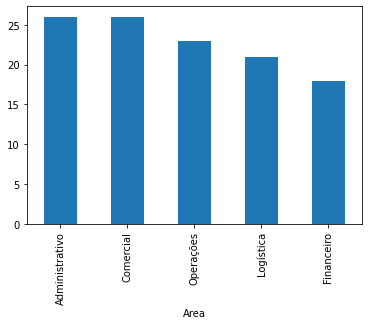

In [386]:
funcionario_area_df = funcionarios_df.value_counts(funcionarios_df['Area'])
print(funcionario_area_df)

funcionario_area_df.plot(kind ='bar')

### Questão 6 - Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [396]:
display(servicos_df.head())
print(servicos_df['Valor Contrato Mensal'].mean())


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Salario Total,Cliente,Valor Contrato Mensal,Valor Total do Contrato
0,OS0001,67,1,14,21629.72,Teixeira Gonçalves,540,7560
1,OS0058,67,78,6,21629.72,Eduardo Resende,1710,10260
2,OS0092,67,125,8,21629.72,De Machado,1710,13680
3,OS0128,67,175,6,21629.72,Vilhena Rossini,945,5670
4,OS0002,17,2,12,27524.92,Souza Santos,1260,15120


2438.3544303797466
